## Load outer libraries

In [2]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

## Load my libraries

In [3]:
from spikeHelper.experiments import expAllRats, eachCross, eachSame
from spikeHelper.dataOrganization import singleRatResults, trialToXyT, getX
from spikeHelper.visuals import evolutionPlot, plotPredResults

In [12]:
#results = expAllRats()
filename = 'semAtividadeMotora_1300ms_1608_50train'
#pickle.dump(results, open('Results/'+str(filename),'wb'))
results = pickle.load( open('Results/'+str(filename),'rb') )

Classificador sem atividade motora

Desempenho por n. neuronios

Reduzir numero de trials de treino. 40?30?

# Resultado médio para cada aspecto

In [5]:
results.iloc[:4,:8].applymap(lambda x: np.nan_to_num(x).mean())

,Late corr,Late kappa,Early corr,Early kappa,Cross late train corr,Cross late train kappa,Cross early train corr,Cross early train kappa
rat 7,0.027215,0.014368,0.105102,0.018684,0.049471,0.030386,0.045738,0.023199
rat 8,0.529541,0.094105,0.549914,0.073789,0.508908,0.393856,0.453197,0.330522
rat 9,0.122592,0.036947,0.479977,0.048632,0.081480,0.078459,0.034088,0.017280
rat 10,0.387614,0.040105,0.505432,0.056211,0.274337,0.159300,0.204300,0.133424


In [149]:
r=results.iloc[:4,:4]
r['rat']=r.index
r=r.melt(id_vars=['rat'],var_name='type')
r['measure'] = r['type'].apply(lambda x: 'kappa' if 'kappa' in x.lower() else 'corr')
r['type'] = r['type'].apply(lambda x: (x[:-5]) if 'kappa' in x.lower() else (x[:-4]))

In [160]:
melted = pd.concat([r, pd.DataFrame(np.vstack(r['value'].apply(lambda x: x.reshape(-1))))],axis=1 ).drop('value',axis=1).melt(id_vars=['rat','measure','type'])
melted.head()

,rat,measure,type,variable,value
0,rat 7,corr,Late,0,3.958395e-01
1,rat 8,corr,Late,0,6.681165e-01
2,rat 9,corr,Late,0,-1.837829e-01
3,rat 10,corr,Late,0,1.863695e-01
4,rat 7,kappa,Late,0,2.220446e-16


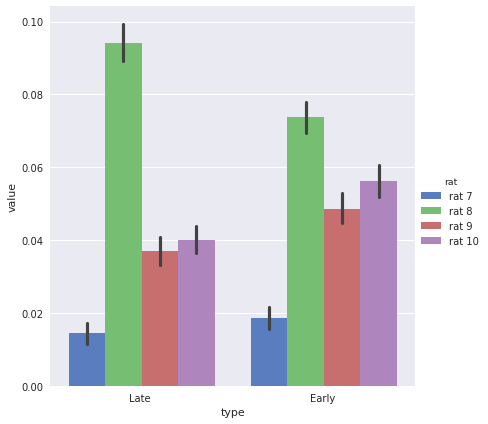

In [169]:
sns.factorplot(x="type", y="value", hue='rat', data=melted[melted['measure']=='kappa'],
                   size=6, kind="bar", palette="muted")

### Desvio padrão

In [13]:
results.iloc[:4,:8].apply(lambda x: x.apply(lambda x: np.nan_to_num(x).std()))

,Late corr,Late kappa,Early corr,Early kappa,Cross late train corr,Cross late train kappa,Cross early train corr,Cross early train kappa
rat 7,0.406033,0.046735,0.386010,0.048893,0.072963,0.037844,0.012359,0.007238
rat 8,0.348030,0.086467,0.354848,0.073239,0.020779,0.013122,0.017494,0.011308
rat 9,0.397635,0.062700,0.434015,0.068385,0.116387,0.074046,0.016341,0.009924
rat 10,0.409647,0.061499,0.410077,0.071922,0.037148,0.022481,0.045712,0.025160


# Evolução do desempenho dos classificadores treinados nas últimas tentativas

In [10]:
results.iloc[:4,-3:-1] = results.iloc[:4,-3:-1].applymap(lambda y: y.apply(np.nan_to_num))

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median for 219 results
  r = func(a, **kwargs)


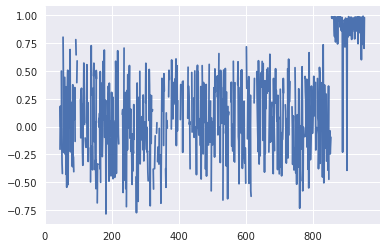

In [25]:
plt.plot(np.median(results['perTrialCorr']['rat 7'],axis=1))

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


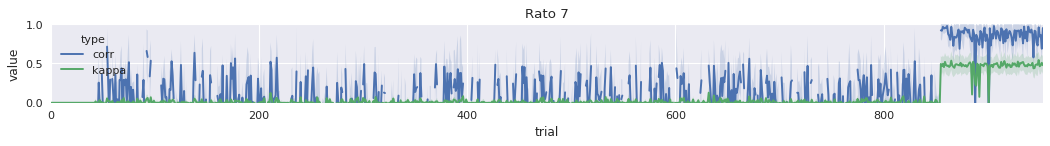

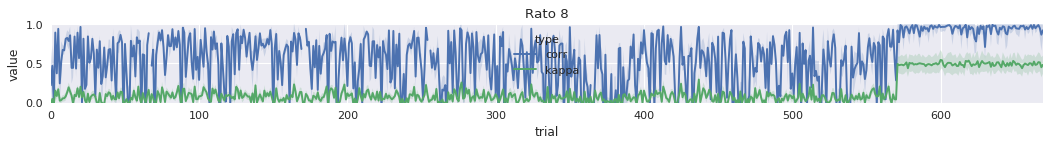

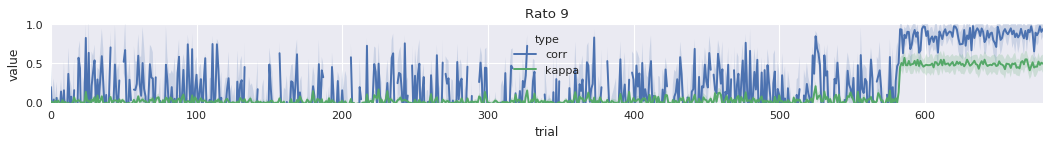

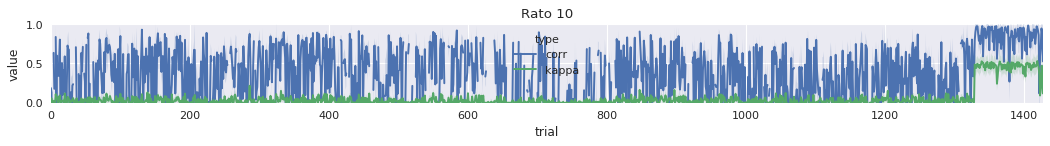

In [6]:
evolutionPlot(results)

28620

In [38]:
results.perTrialCorr['rat 7'].isnull().sum().sum()/(results.perTrialCorr['rat 7'].shape[0]*results.perTrialCorr['rat 7'].shape[1])

0.11837875611460517

In [41]:
results.perTrialCorr['rat 8'].isnull().sum().sum()/(results.perTrialCorr['rat 8'].shape[0]*results.perTrialCorr['rat 8'].shape[1])

0.00049751243781094524

In [40]:
results.perTrialCorr['rat 9'].isnull().sum().sum()/(results.perTrialCorr['rat 9'].shape[0]*results.perTrialCorr['rat 9'].shape[1])

0.021309872922776148

In [39]:
results.perTrialCorr['rat 10'].isnull().sum().sum()/(results.perTrialCorr['rat 10'].shape[0]*results.perTrialCorr['rat 10'].shape[1])

0.056092436974789918

---

In [7]:
results = expAllRats(train_size=.9)
filename = 'semAtividadeMotora_1300ms_2008_50train_90train'
pickle.dump(results, open('Results/'+str(filename),'wb'))

Calculating for rat 7
Grid Searching
Direct training
Analyzing trial 860
Analyzing trial 870
Analyzing trial 880
Analyzing trial 890
Analyzing trial 900
Analyzing trial 910
Analyzing trial 920
Analyzing trial 930
Analyzing trial 940
Analyzing trial 950


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 8
Grid Searching
Direct training
Analyzing trial 580
Analyzing trial 590
Analyzing trial 600
Analyzing trial 610
Analyzing trial 620
Analyzing trial 630
Analyzing trial 640
Analyzing trial 650
Analyzing trial 660
Analyzing trial 670
Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90
Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
W

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 9
Grid Searching
Direct training
Analyzing trial 590
Analyzing trial 600
Analyzing trial 610
Analyzing trial 620
Analyzing trial 630
Analyzing trial 640
Analyzing trial 650
Analyzing trial 660
Analyzing trial 670
Analyzing trial 680


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 10
Grid Searching
Direct training
Analyzing trial 1330
Analyzing trial 1340
Analyzing trial 1350
Analyzing trial 1360
Analyzing trial 1370
Analyzing trial 1380
Analyzing trial 1390
Analyzing trial 1400
Analyzing trial 1410
Analyzing trial 1420


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [12]:
results = expAllRats(train_size=.8)
filename = 'semAtividadeMotora_1300ms_2008_50train_80train'
pickle.dump(results, open('Results/'+str(filename),'wb'))

Calculating for rat 7
Grid Searching
Direct training
Analyzing trial 860
Analyzing trial 870
Analyzing trial 880
Analyzing trial 890
Analyzing trial 900
Analyzing trial 910
Analyzing trial 920
Analyzing trial 930
Analyzing trial 940
Analyzing trial 950


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 8
Grid Searching
Direct training
Analyzing trial 580
Analyzing trial 590
Analyzing trial 600
Analyzing trial 610
Analyzing trial 620
Analyzing trial 630
Analyzing trial 640
Analyzing trial 650
Analyzing trial 660
Analyzing trial 670
Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90
Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
W

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 9
Grid Searching
Direct training
Analyzing trial 590
Analyzing trial 600
Analyzing trial 610
Analyzing trial 620
Analyzing trial 630
Analyzing trial 640
Analyzing trial 650
Analyzing trial 660
Analyzing trial 670
Analyzing trial 680


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90
Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Workin

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 10
Grid Searching
Direct training
Analyzing trial 1330
Analyzing trial 1340
Analyzing trial 1350
Analyzing trial 1360
Analyzing trial 1370
Analyzing trial 1380
Analyzing trial 1390
Analyzing trial 1400
Analyzing trial 1410
Analyzing trial 1420


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [13]:
results = expAllRats(train_size=.7)
filename = 'semAtividadeMotora_1300ms_2008_50train_70train'
pickle.dump(results, open('Results/'+str(filename),'wb'))

Calculating for rat 7
Grid Searching
Direct training
Analyzing trial 860
Analyzing trial 870
Analyzing trial 880
Analyzing trial 890
Analyzing trial 900
Analyzing trial 910
Analyzing trial 920
Analyzing trial 930
Analyzing trial 940
Analyzing trial 950


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 8
Grid Searching
Direct training
Analyzing trial 580
Analyzing trial 590
Analyzing trial 600
Analyzing trial 610
Analyzing trial 620
Analyzing trial 630
Analyzing trial 640
Analyzing trial 650
Analyzing trial 660
Analyzing trial 670
Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 9
Grid Searching
Direct training
Analyzing trial 590
Analyzing trial 600
Analyzing trial 610
Analyzing trial 620
Analyzing trial 630
Analyzing trial 640
Analyzing trial 650
Analyzing trial 660
Analyzing trial 670
Analyzing trial 680


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Calculating for rat 10
Grid Searching
Direct training
Analyzing trial 1330
Analyzing trial 1340
Analyzing trial 1350
Analyzing trial 1360
Analyzing trial 1370
Analyzing trial 1380
Analyzing trial 1390
Analyzing trial 1400
Analyzing trial 1410
Analyzing trial 1420


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Analyzing trial 0
Analyzing trial 10
Analyzing trial 20
Analyzing trial 30
Analyzing trial 40
Analyzing trial 50
Analyzing trial 60
Analyzing trial 70
Analyzing trial 80
Analyzing trial 90


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Cross training
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuffle #13
Working on shuffle #14
Working on shuffle #15
Working on shuffle #16
Working on shuffle #17
Working on shuffle #18
Working on shuffle #19
Working on shuffle #20
Working on shuffle #21
Working on shuffle #22
Working on shuffle #23
Working on shuffle #24
Working on shuffle #25
Working on shuffle #26
Working on shuffle #27
Working on shuffle #28
Working on shuffle #29
Working on shuffle #0
Working on shuffle #1
Working on shuffle #2
Working on shuffle #3
Working on shuffle #4
Working on shuffle #5
Working on shuffle #6
Working on shuffle #7
Working on shuffle #8
Working on shuffle #9
Working on shuffle #10
Working on shuffle #11
Working on shuffle #12
Working on shuff

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


## Utilizando 90 trials para treino

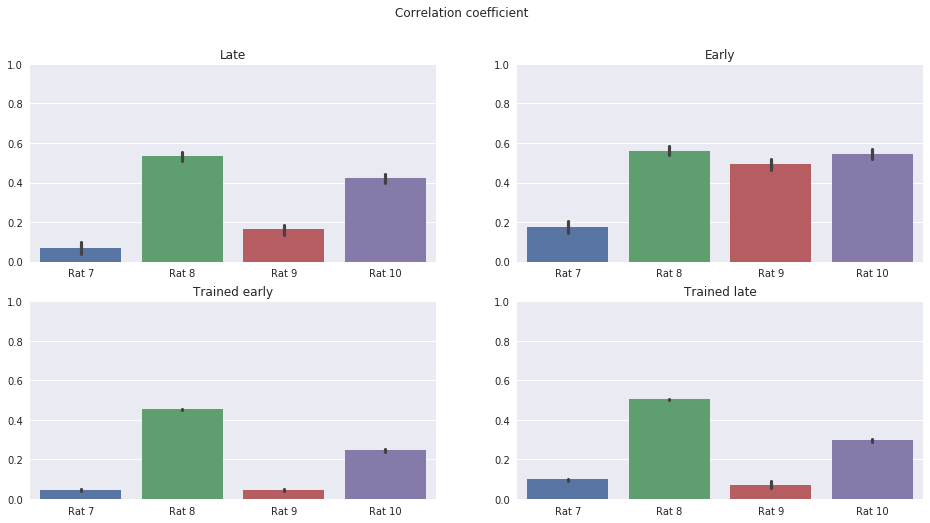

In [4]:
filename = 'Results/semAtividadeMotora_1300ms_2008_50train_90train'
results = pickle.load(open(filename,'rb'))
plotPredResults(results)

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


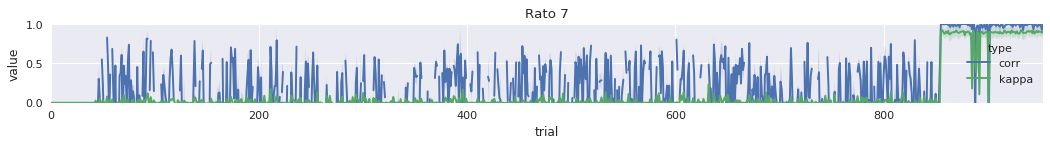

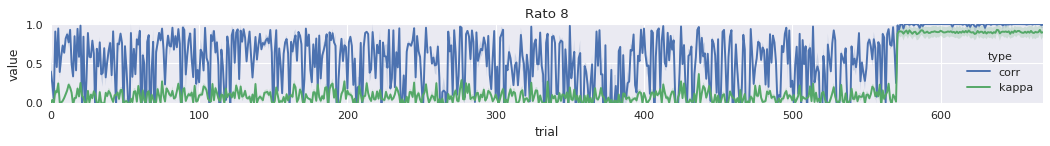

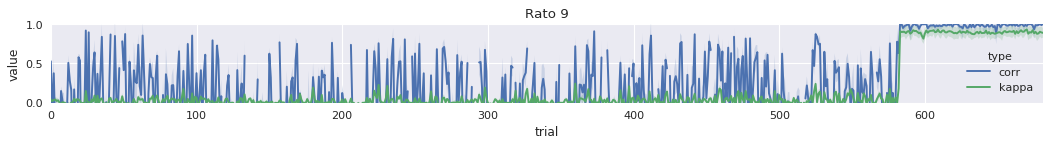

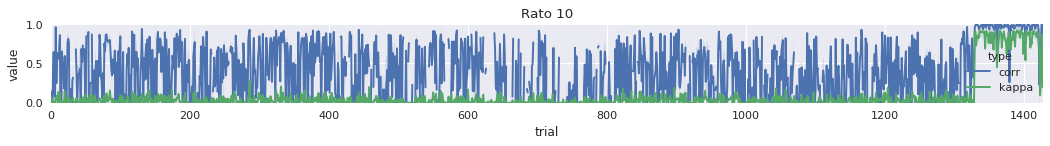

In [5]:
evolutionPlot(results)

## Utilizando 80 trials para treino

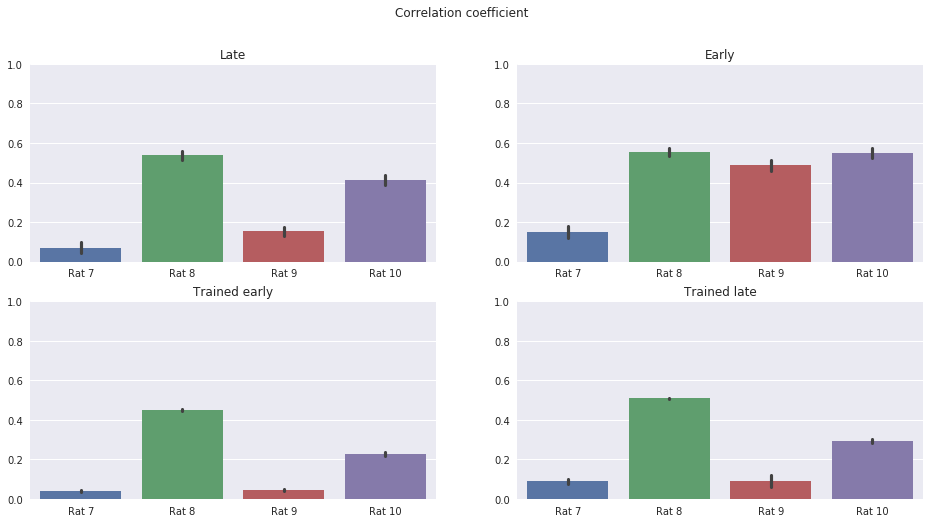

In [8]:
filename = 'Results/semAtividadeMotora_1300ms_2008_50train_80train'
results = pickle.load(open(filename,'rb'))
plotPredResults(results)

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


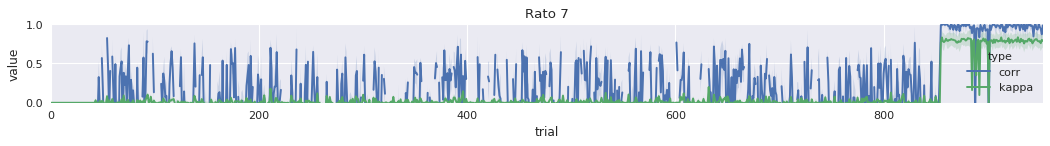

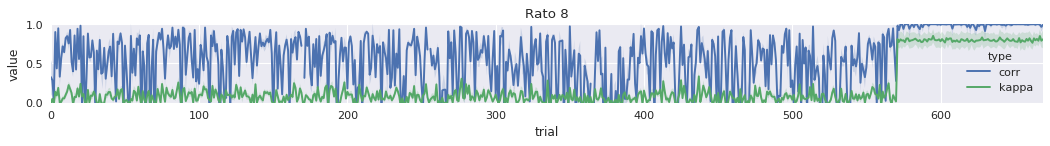

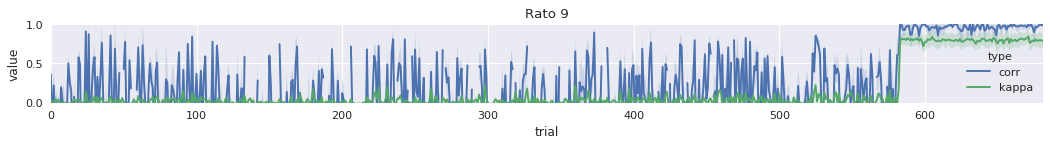

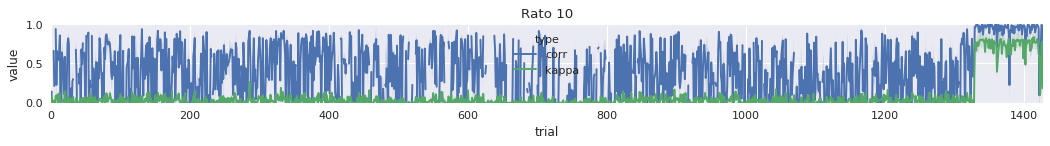

In [9]:
evolutionPlot(results)

## Utilizando 70 trials para treino

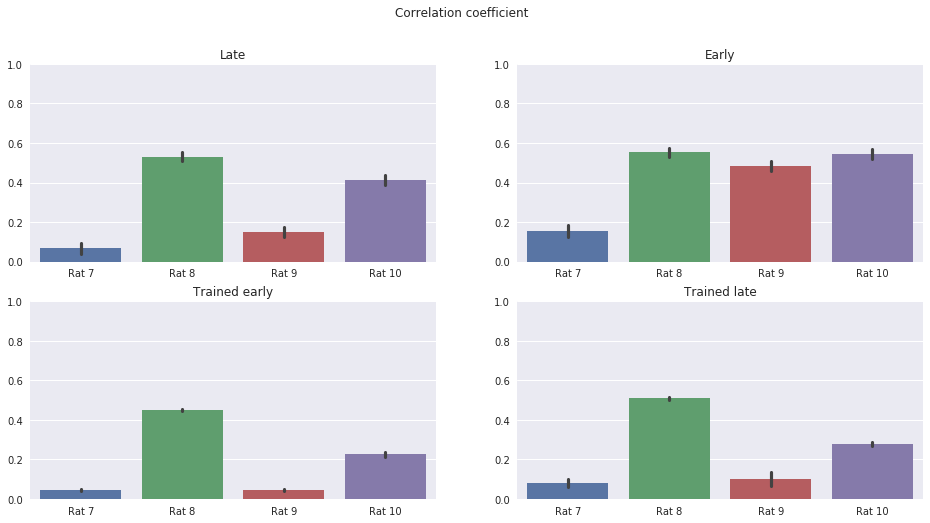

In [10]:
filename = 'Results/semAtividadeMotora_1300ms_2008_50train_70train'
results = pickle.load(open(filename,'rb'))
plotPredResults(results)

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


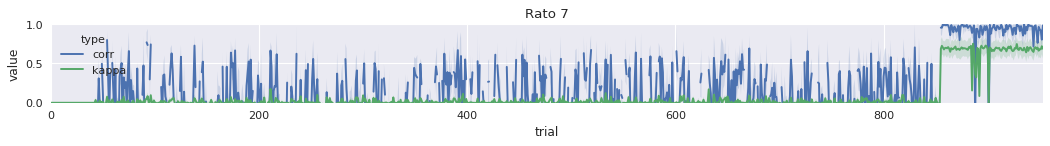

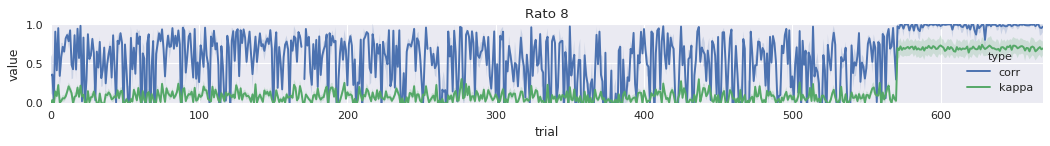

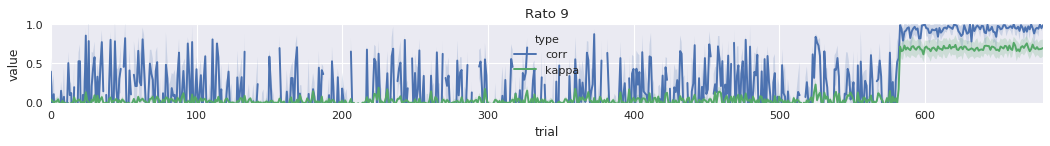

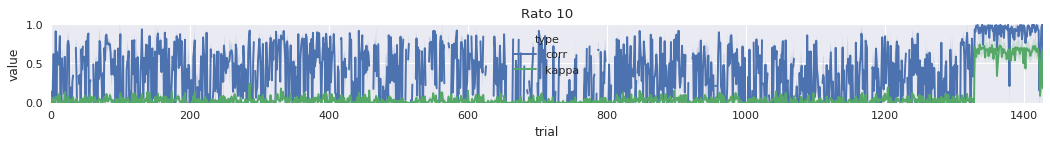

In [11]:
evolutionPlot(results)